In [24]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import time 
import sklearn

In [25]:
global filename
global train
global svm_acc,svmga_acc,rf_acc,dt_acc,pca_acc,nba_acc
global X_train,X_test,y_train,y_test,X
global svmga_classifier
global svm_time,svmga_time,rf_time,dt_time,pca_time,nb_time
global svm_cls,svmga_cls,rf_cls,dt_cls,pca_cls,nb_cls
global dataset

In [26]:
filename="C:/Users/Bhavani/Downloads/GEO.csv"
dataset=pd.read_csv(filename)
dataset.columns


Index(['diseaseId', 'geneId', 'geneSymbol', 'DSI', 'DPI', 'diseaseName',
       'diseaseType', 'diseaseClass', 'diseaseSemanticType', 'score', 'EI',
       'Gene_Description', 'PsychiatricDisorder', 'diseaseClassNameMSH',
       'doClassId', 'doClassName', 'umlsSemanticTypeId',
       'umlsSemanticTypeName', 'HGNC.ID', 'Approved.name', 'Ensembl.gene.ID'],
      dtype='object')

In [27]:
def prepareDataset():

    global X_train, X_test, y_train, y_test

    global dataset

    global X
    filename="C:/Users/Bhavani/Downloads/GEO.csv"
    dataset=pd.read_csv(filename)

    #Dropping unwanted columns

    dataset=dataset.drop(['diseaseId', 'geneId', 'geneSymbol', 'HGNC.ID', 'Approved.name', 'Ensembl.gene.ID','umlsSemanticTypeId','umlsSemanticTypeName'],axis=1)
    dataset=dataset.drop(['doClassId', 'doClassName'], axis = 1) 

    dataset['diseaseName']= dataset['diseaseName'].astype('category')

    dataset['diseaseType']= dataset['diseaseType'].astype('category')
    dataset['diseaseClass']= dataset['diseaseClass'].astype('category')

    dataset['diseaseSemanticType']= dataset['diseaseSemanticType'].astype('category') 
    dataset['Gene_Description']= dataset['Gene_Description'].astype('category')

    dataset['diseaseClassNameMSH']= dataset['diseaseClassNameMSH'].astype('category')
    dataset['PsychiatricDisorder'] = dataset['PsychiatricDisorder'].astype('category')

    #Changing all the str type data to integer type for prediction using cat.codes
    dataset['diseaseName']=dataset['diseaseName'].cat.codes

    dataset['diseaseType']=dataset['diseaseType'].cat.codes
    dataset['diseaseClass']=dataset['diseaseClass'].cat.codes

    dataset['diseaseSemanticType']=dataset['diseaseSemanticType'].cat.codes
    dataset['Gene_Description']=dataset['Gene_Description'].cat.codes

    dataset['diseaseClassNameMSH']=dataset['diseaseClassNameMSH'].cat.codes

    #Defining label and attributes

    X = dataset.drop('PsychiatricDisorder', axis=1)

    Y = dataset['PsychiatricDisorder']
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)            

In [28]:
prepareDataset()
dataset.columns

Index(['DSI', 'DPI', 'diseaseName', 'diseaseType', 'diseaseClass',
       'diseaseSemanticType', 'score', 'EI', 'Gene_Description',
       'PsychiatricDisorder', 'diseaseClassNameMSH'],
      dtype='object')

In [29]:
dataset.dtypes

DSI                     float64
DPI                     float64
diseaseName                int8
diseaseType                int8
diseaseClass               int8
diseaseSemanticType        int8
score                   float64
EI                      float64
Gene_Description           int8
PsychiatricDisorder    category
diseaseClassNameMSH        int8
dtype: object

In [30]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import time 
import sklearn

In [31]:
def mnbClassifier():

    global nb_acc

    global nb_time

    global nb_cls

    start_time=time.time()

    nb_cls=MultinomialNB()

    nb_cls.fit(X_train, y_train)

    y_pred=nb_cls.predict(X_test)

    nb_acc=accuracy_score(y_test, y_pred)*100

    nb_time= (time.time() - start_time)

In [32]:
mnbClassifier()
print("Accuracy:", nb_acc)
print("Execution time:", nb_time)

Accuracy: 81.0229799851742
Execution time: 0.032759666442871094


In [33]:
temp=X_test.loc[[4430]]
print (temp)
testprediction=nb_cls.predict(temp)
print (testprediction[0])

        DSI    DPI  diseaseName  diseaseType  diseaseClass  \
4430  0.656  0.448            5            0             5   

      diseaseSemanticType  score   EI  Gene_Description  diseaseClassNameMSH  
4430                    1    0.4  1.0                15                    3  
DEPRESSIVE DISORDERS


In [34]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import time 
import sklearn

In [35]:
def KnnClassifier():
    global knn_acc
    global knn_time
    global knn_cls
    start_time=time.time()
    knn_cls=KNeighborsClassifier(n_neighbors=10,)
    knn_cls.fit(X_train,y_train)
    y_pred=knn_cls.predict(X_test)
    knn_acc=accuracy_score(y_test,y_pred)*100
    knn_time=(time.time()-start_time)

In [36]:
KnnClassifier()
print("Accuracy:", knn_acc)
print("Execution time:", knn_time)

Accuracy: 98.96219421793921
Execution time: 0.14487218856811523


In [37]:
temp=X_test.loc[[3801]]
print (temp)
testprediction=knn_cls.predict(temp)
print (testprediction[0])

        DSI    DPI  diseaseName  diseaseType  diseaseClass  \
3801  0.648  0.655            5            0             5   

      diseaseSemanticType  score   EI  Gene_Description  diseaseClassNameMSH  
3801                    1   0.01  1.0                 6                    3  
DEPRESSIVE DISORDERS


In [38]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time 
import sklearn

In [39]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time 
import sklearn

In [40]:
global filename
global train
global svm_acc,svmga_acc,rf_acc,dt_acc,pca_acc,nba_acc
global X_train,X_test,y_train,y_test,X
global svmga_classifier
global svm_time,svmga_time,rf_time,dt_time,pca_time,nb_time
global svm_cls,svmga_cls,rf_cls,dt_cls,pca_cls,nb_cls
global dataset

In [41]:
def rfClassifier():
    global rf_acc
    global rf_time
    global rf_cls
    start_time=time.time()
    rf_cls=RandomForestClassifier(n_estimators=100,random_state=0)
    rf_cls.fit(X_train,y_train)
    y_pred=rf_cls.predict(X_test)
    rf_acc=accuracy_score(y_test,y_pred)*100
    rf_time=(time.time()-start_time)

In [42]:
rfClassifier()
print("Accuracy:",rf_acc)
print("Execution time:",rf_time)

Accuracy: 98.96219421793921
Execution time: 0.6561944484710693


In [43]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time 
import sklearn

In [44]:
def dtClassifier():
    global dt_acc
    global dt_time
    global dt_cls
    start_time=time.time()
    dt_cls=DecisionTreeClassifier()
    dt_cls.fit(X_train,y_train)
    y_pred=dt_cls.predict(X_test)
    dt_acc=accuracy_score(y_test,y_pred)*100
    dt_time=(time.time()-start_time)

In [45]:
dtClassifier()
print("Accuracy:",dt_acc)
print("Execution time:",dt_time)

Accuracy: 98.66567828020756
Execution time: 0.01246786117553711


In [46]:
temp=X_test.loc[[142]]
print (temp)
testprediction=dt_cls.predict(temp)
print (testprediction[0])

       DSI    DPI  diseaseName  diseaseType  diseaseClass  \
142  0.472  0.724           15            0             5   

     diseaseSemanticType  score   EI  Gene_Description  diseaseClassNameMSH  
142                    1   0.31  1.0                13                    3  
SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS


In [47]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import time 
import sklearn

In [48]:
def svmClassifier():
    global svm_acc
    global svm_time
    global svm_cls
    start_time=time.time()
    svm_cls=svm.SVC(C=2.0,gamma='scale',kernel='rbf',random_state=2)
    svm_cls.fit(X_train,y_train)
    y_pred=svm_cls.predict(X_test)
    svm_acc=accuracy_score(y_test,y_pred)*100
    svm_time=(time.time()-start_time)

In [49]:
svmClassifier()
print("Accuracy:",svm_acc)
print("Execution time:",svm_time)

Accuracy: 98.07264640474426
Execution time: 0.8555207252502441


In [51]:
print(X_test.head(8))
print(y_test.head(8))

        DSI    DPI  diseaseName  diseaseType  diseaseClass  \
4358  0.596  0.621            5            0             5   
3801  0.648  0.655            5            0             5   
4430  0.656  0.448            5            0             5   
142   0.472  0.724           15            0             5   
2370  0.720  0.276           14            0             5   
3637  0.494  0.724            5            0             5   
1848  0.639  0.310            5            0             5   
4209  0.534  0.586            5            0             5   

      diseaseSemanticType  score   EI  Gene_Description  diseaseClassNameMSH  
4358                    1   0.01  1.0                15                    3  
3801                    1   0.01  1.0                 6                    3  
4430                    1   0.40  1.0                15                    3  
142                     1   0.31  1.0                13                    3  
2370                    1   0.31  1.0         

In [54]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import time 
import sklearn

In [55]:
def cal_accuracy(y_test,y_pred,details):
    cm=confusion_matrix(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)*100
    text.insert(END,details+"\n\n")
    text.insert(END,"Accuracy:"+str(accuracy)+"\n\n")
    text.insert(END,"Report:"+str(classification_report(y_test,y_pred))+"\n")
    text.insert(END,"Confusion Matrix:\n\n"+str(cm)+"\n\n\n\n\n")
    return accuracy

In [79]:
def runSVM():
    text.delete('1.0',END)
    svmClassifier()
    prediction_data=svm_cls.predict(X_test)
    svm_acc=cal_accuracy(y_test,prediction_data,"SVM:")

In [80]:
def runRF():
    text.delete('1.0',END)
    rfClassifier()
    prediction_data=rf_cls.predict(X_test)
    rf_acc=cal_accuracy(y_test,prediction_data,"Random Forest:")

In [81]:
def runDT():
    text.delete('1.0',END)
    dtClassifier()
    prediction_data=dt_cls.predict(X_test)
    dt_acc=cal_accuracy(y_test,prediction_data,"Decision Tree:")

In [89]:
def runKNN():
    text.delete('1.0',END)
    KnnClassifier()
    prediction_data=knn_cls.predict(X_test)
    knn_acc=cal_accuracy(y_test,prediction_data,"KNN:")

In [96]:
def runNB():
    text.delete('1.0',END)
    mnbClassifier()
    prediction_data=nb_cls.predict(X_test)
    mnb_acc=cal_accuracy(y_test,prediction_data,"Naive bayes:")

In [117]:
def graph():
    height=[svm_acc,rf_acc,dt_acc,knn_acc,nb_acc]
    bars=('SVM','Random Forest','Decision Tree','KNN','MNB')
    y_pos=np.arange(len(bars))
    plt.bar(y_pos,height)
    plt.xticks(y_pos,bars,rotation=90)
    plt.show()

In [118]:
def timeGraph():
    height=[svm_time,rf_time,dt_time,knn_time,nb_time]
    bars=('SVM','Random Forest','Decision Tree','KNN','MNB')
    y_pos=np.arange(len(bars))
    plt.bar(y_pos,height)
    plt.xticks(y_pos,bars,rotation=90)
    plt.show()
    

In [119]:
def upload():
    global filename
    filename=filedialog.askopenfilename(initialdir="dataset")
    pathlabel.config(text=filename)
    text.delete('1.0',END)
    text.insert(END,filename+"loaded\n");

In [120]:
def generateDataset():
    text.delete('1.0',END)
    prepareDataset()
    text.insert(END,"Dataset Length:"+str(len(X))+"\n");
    text.insert(END,"Splitted Training Length:"+str(len(X_train))+"\n");
    text.insert(END,"Splitted Test Length:"+str(len(X_test))+"\n\n");
    

C:\Users\Bhavani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhavani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


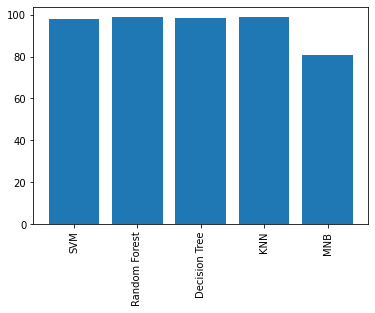

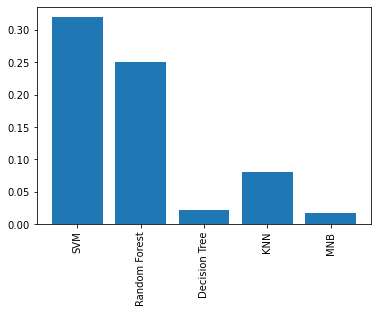

In [123]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
from tkinter.filedialog import askopenfilename


main=tkinter.Tk()
main.title("Risk analysis on genetic diseases")
#main.geometry("13001200")
main.configure(background='#b8b5ff')

font=('times',20,'bold')
title=Label(main,text='ML Approach for Risk Analysis on Genetic Disease',fg='red',bg='#b8b5ff')
font1=('times',14,'bold')
uploadButton=Button(main,text="Upload Dataset",command=upload,bg='blue',fg='white')
uploadButton.config(font=font1)

pathlabel=Label(main)
pathlabel.config(bg='brown',fg='white')
pathlabel.config(font=font1)
pathlabel.place(x=460,y=100)

generateButton=Button(main,text="Generate Train and Test dataset",command=generateDataset,bg='#77d6fd')
generateButton.place(x=50,y=150)
generateButton.config(font=font1)

svmButton=Button(main,text="Run SVM Algorithm",command=runSVM,bg='#77d6fd')
svmButton.place(x=340,y=150)
svmButton.config(font=font1)

rfButton=Button(main,text="Run Random Forest Algorithm",command=runRF,bg='#77d6fd')
rfButton.place(x=540,y=150)
rfButton.config(font=font1)

dtButton=Button(main,text="Run Decision Tree Algorithm",command=runDT,bg='#77d6fd')
dtButton.place(x=50,y=200)
dtButton.config(font=font1)

knnButton=Button(main,text="Run KNN Algorothm",command=runKNN,bg='#77d6fd')
knnButton.place(x=330,y=200)
knnButton.config(font=font1)

nbButton=Button(main,text="Run MNB Algorithm",command=runNB,bg='#77d6fd')
nbButton.place(x=540,y=200)
nbButton.config(font=font1)

graphButton=Button(main,text="Accuracy Graph",command=graph,bg='#77d6fd')
graphButton.place(x=770,y=200)
graphButton.config(font=font1)

exitButton=Button(main,text="Time Graph",command=timeGraph,bg='#77d6fd')
exitButton.place(x=970,y=200)
exitButton.config(font=font1)



font1=('times',12,'bold')
text=Text(main,height=20,width=150)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=250)
text.config(font=font1)
main.mainloop()





